In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

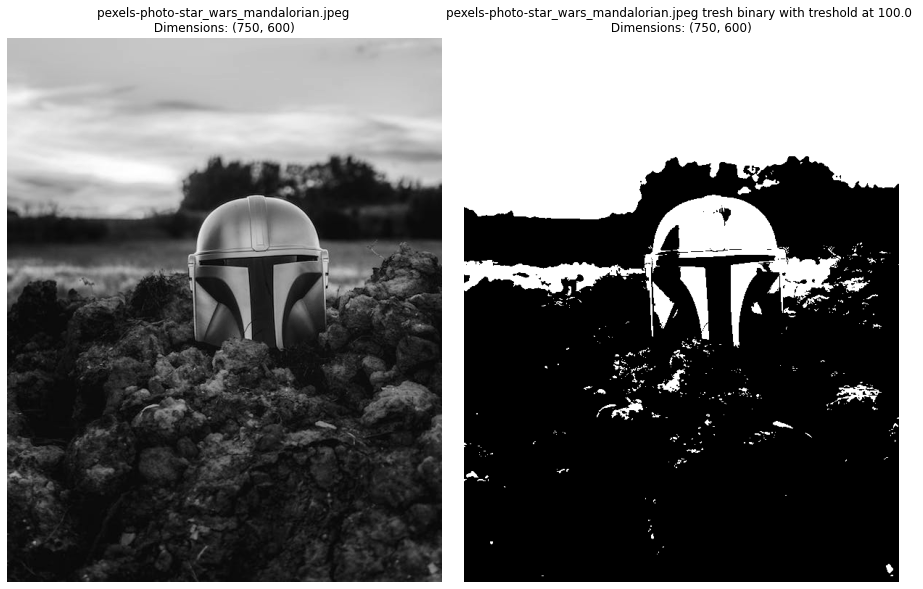

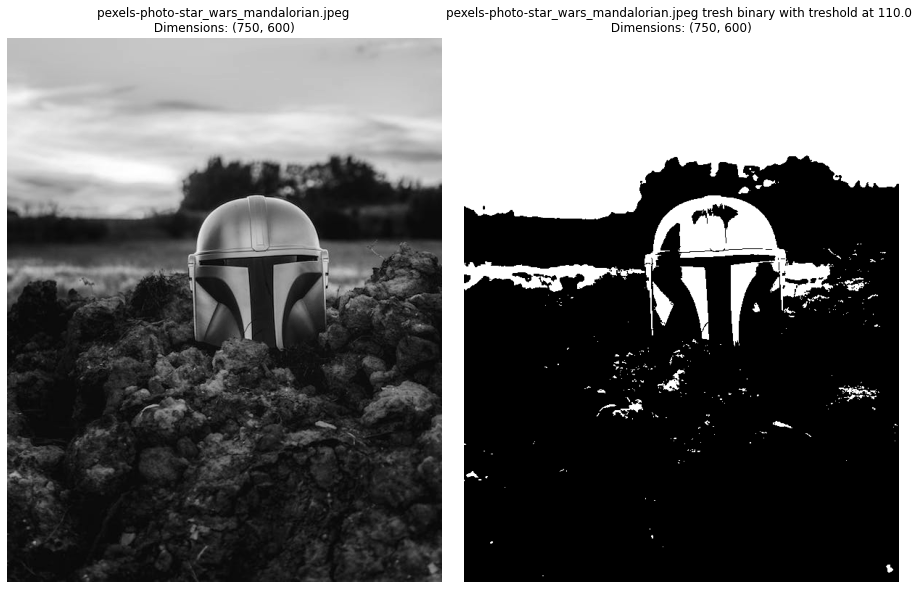

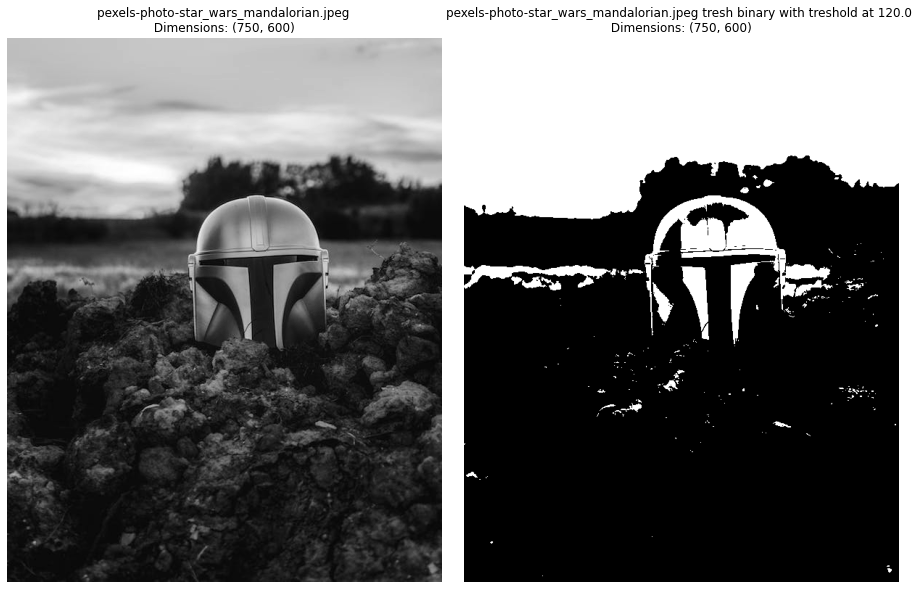

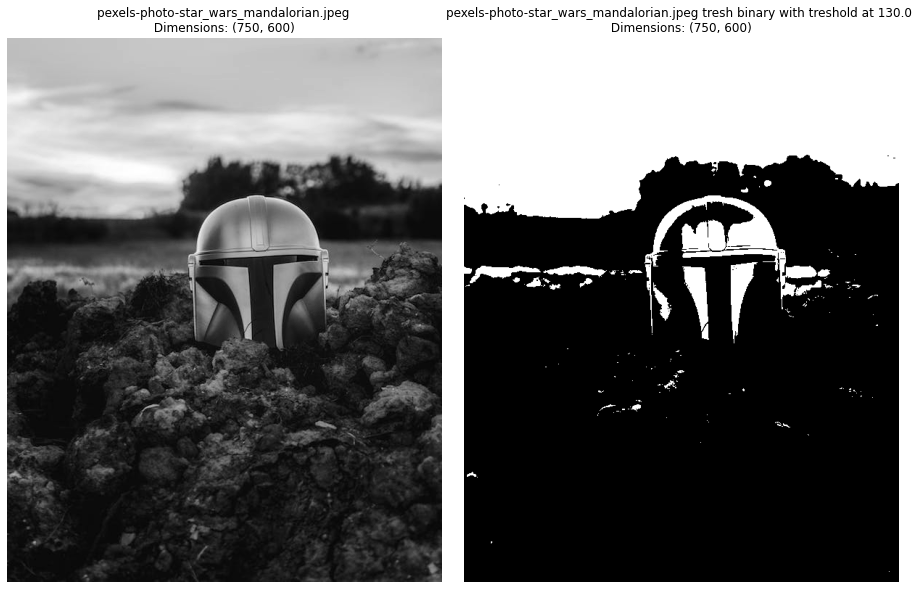

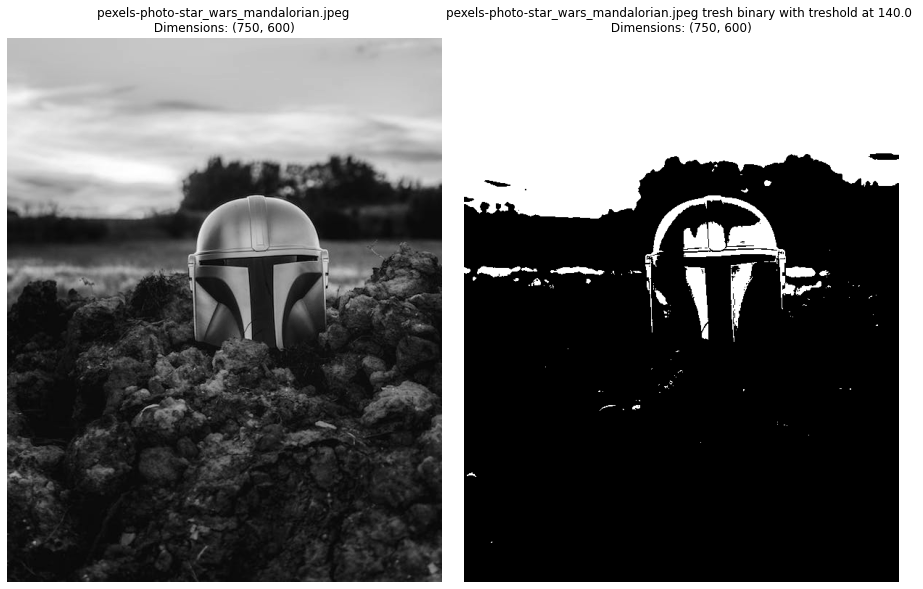

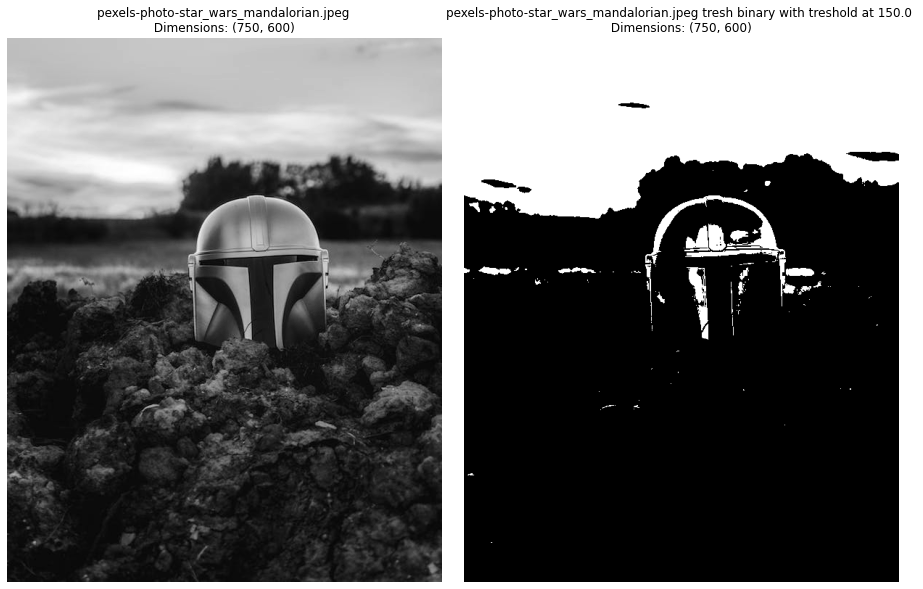

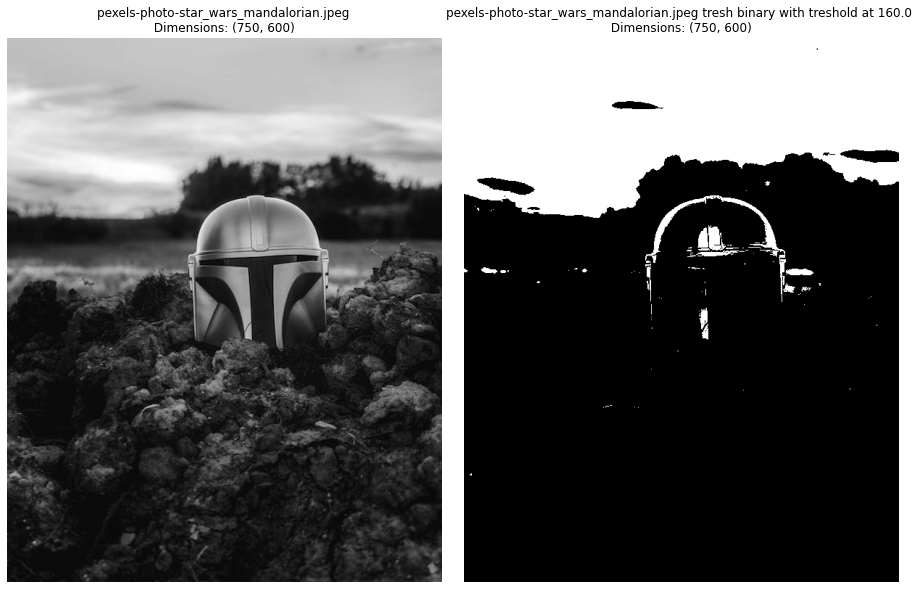

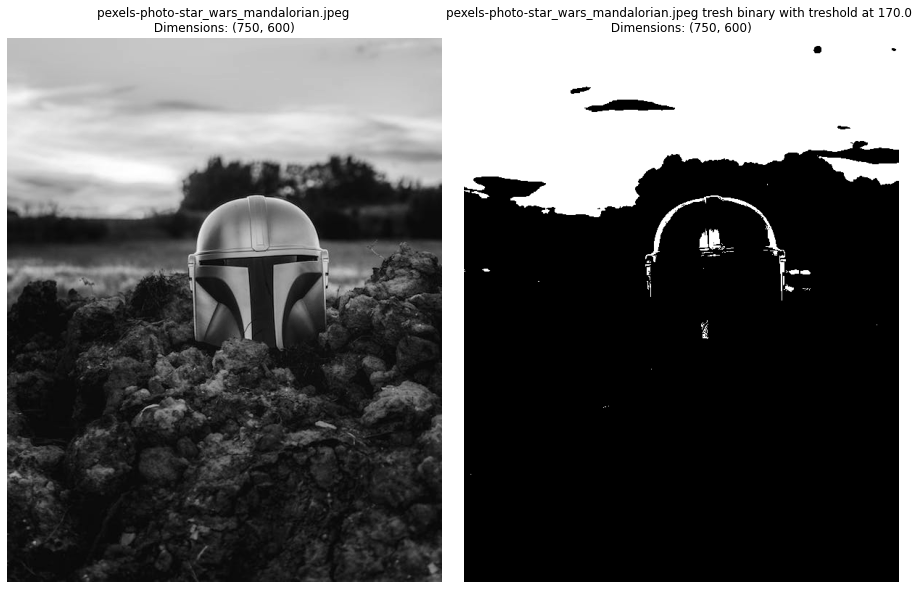

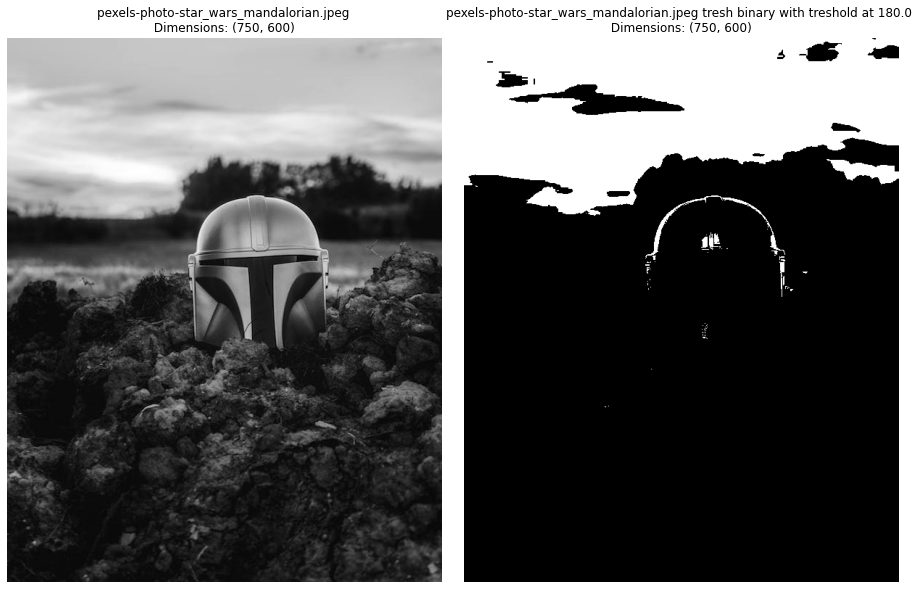

In [3]:
path_img = 'pexels-photo-star_wars_mandalorian.jpeg'
image = cv.imread(path_img, cv.IMREAD_GRAYSCALE)
for tr in range(100, 190, 10):
    ret,thresh1 = cv.threshold(image,tr,255,cv.THRESH_BINARY)
    figure = plt.figure(figsize=(30,10))
    figure.add_subplot(1, 2, 1)
    plt.title(f'{path_img} \n Dimensions: {image.shape} ')
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    figure.add_subplot(1, 3, 2)
    plt.title(f'{path_img} tresh binary with treshold at {ret} \n Dimensions: {image.shape} ')
    plt.imshow(thresh1, cmap='gray')
    plt.axis('off')
    plt.show()

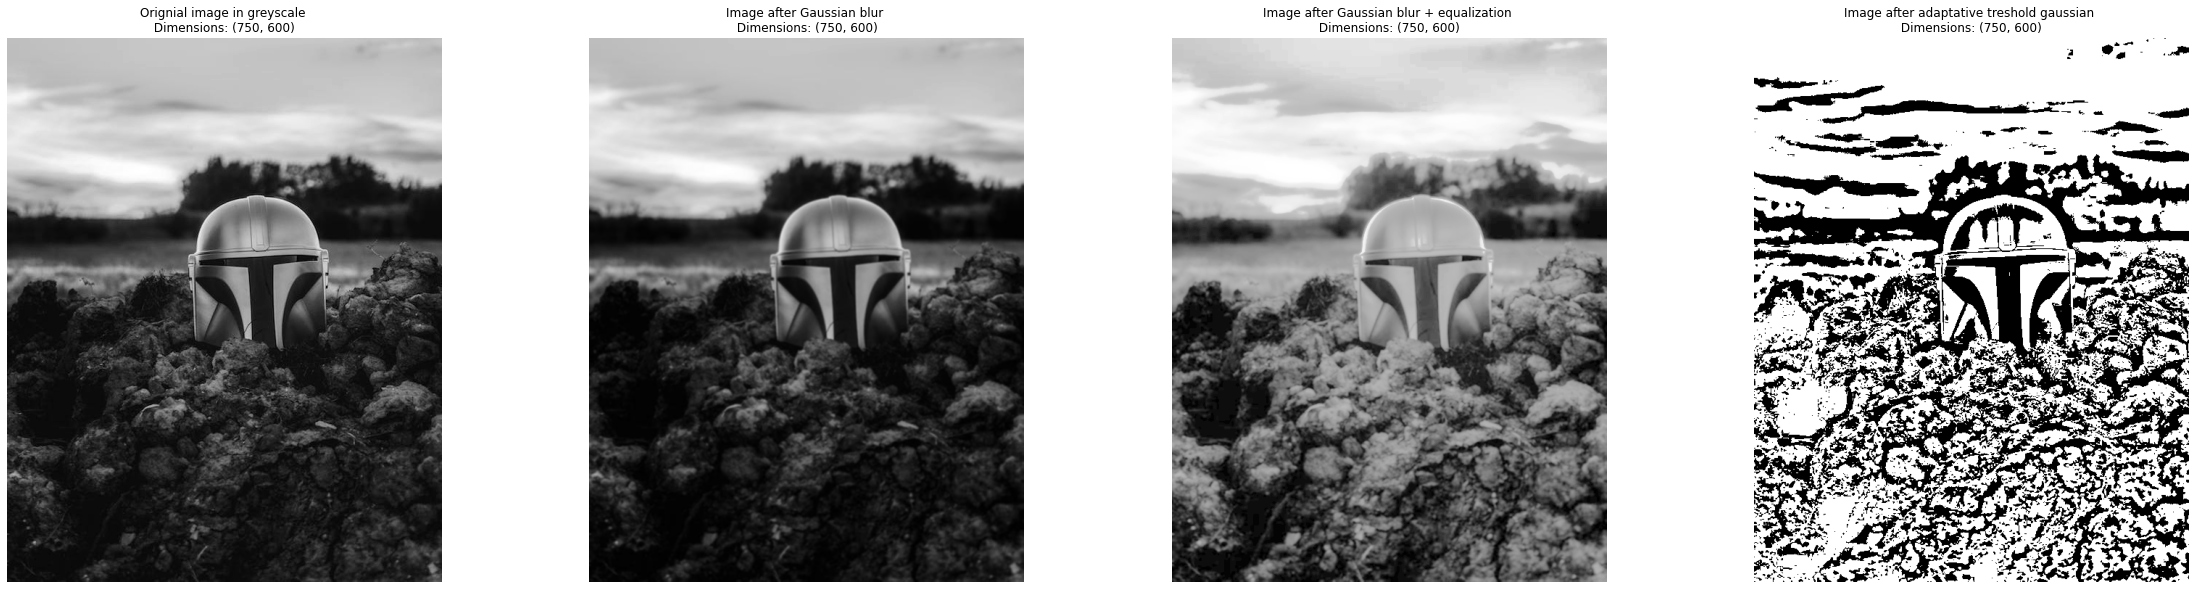

In [4]:
# trying several preprocessing
image1 = cv.GaussianBlur(image, (5, 5), 0)
image2 = cv.equalizeHist(image1)
image3 = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY,55,4)
figure1 = plt.figure(figsize=(40,10))
figure1.add_subplot(1, 4, 1)
plt.title(f'Orignial image in greyscale \n Dimensions: {image.shape} ')
plt.imshow(image, cmap='gray')
plt.axis('off')
figure1.add_subplot(1, 4, 2)
plt.title(f'Image after Gaussian blur \n Dimensions: {image1.shape} ')
plt.imshow(image1, cmap='gray')
plt.axis('off')
figure1.add_subplot(1, 4, 3)
plt.title(f'Image after Gaussian blur + equalization \n Dimensions: {image2.shape} ')
plt.imshow(image2, cmap='gray')
plt.axis('off')
figure1.add_subplot(1, 4, 4)
plt.title(f'Image after adaptative treshold gaussian \n Dimensions: {image3.shape} ')
plt.imshow(image3, cmap='gray')
plt.axis('off')
plt.show()

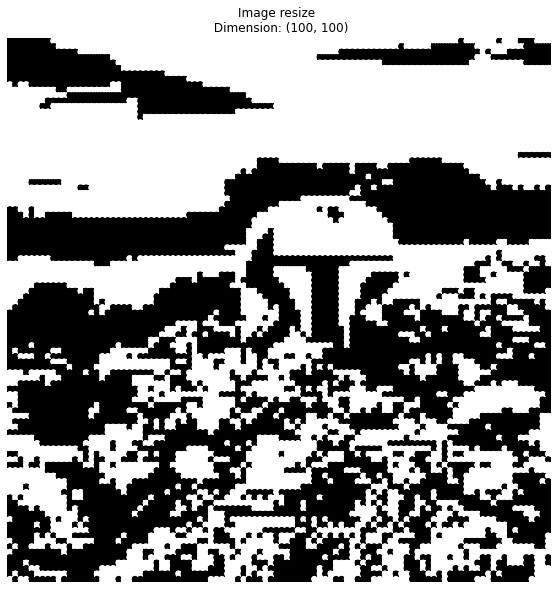

In [5]:
# I think it is better to resize the image before using the adaptative threshold, the gray level are impacted during the resizing
figure2 = plt.figure(figsize=(10,10))
image4 = cv.resize(image, (100,100))
image5 = cv.adaptiveThreshold(image4,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv.THRESH_BINARY,55,4)
plt.title(f'Image resize \n Dimension: {image4.shape}')
plt.imshow(image5, cmap='gray')
ax = plt.gca()
plt.axis('off')
# to add filled circle in place of a pixel we must pass through ax with add_patch method
# for now I only find the solution of add cirlce patch for each pixels in the image...
for i in range(image5.shape[0]):
    for j in range(image5.shape[1]):
        value = image5[i, j]
        if value != 255:
            ax.add_patch(plt.Circle([j,i], radius=0.5, color='k',lw=1, fill=True))
        else:
            ax.add_patch(plt.Circle([j,i], radius=0.5, color='w',lw=1, fill=True))
plt.show()

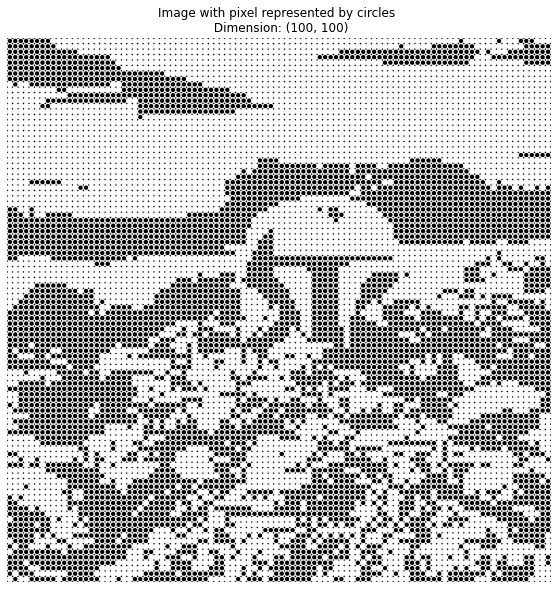

In [9]:
figure3 = plt.figure(figsize=(10,10))
plt.title(f'Image with pixel represented by circles \n Dimension: {image4.shape}')
ax = plt.gca()
plt.axis('off')
# create white image in the dimensions of our actual image
img_bw_white = np.ones([100,100], dtype=np.uint8)*255
# using this white image to represent our pixels in circles
plt.imshow(img_bw_white, cmap='gray')
# to add filled circle in place of a pixel we must pass through ax with add_patch method
# for now I only find the solution of add cirlce patch for each pixels in the image...
for i in range(image5.shape[0]):
    for j in range(image5.shape[1]):
        value = image5[i, j]
        if value != 255:
            ax.add_patch(plt.Circle([j,i], radius=0.5, facecolor='k' ,edgecolor='w',lw=1, fill=True))
        else:
            ax.add_patch(plt.Circle([j,i], radius=0.5, facecolor='w', edgecolor='w',lw=1, fill=True))

#plt.savefig('image_post_processing_test.jpeg')
plt.show()


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)